# Test idea fitness vs inbreeding

The most naive implementation doesn't work. The main point is that the whole population( both females and males )  collapse to a point because of the fact that a son is a mix of the parents, so the variance in the genome is lost no matter how parents are paired

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#definition of all the functions needed in the simulation

def generate_individual(n):
    '''
    returns an array of n bits representing a random genome of an individual
    '''
    return np.array( list(np.binary_repr(np.random.randint(0,2**n),n)),dtype=int)

def fitness (male, female, weight = 1):
    '''
    params:
    male - genetic sequence of male 
    female - genetic sequence of female
    weight - importance of genetic similarity between male and female with respect to male's fitness
    returns the fitness of a male with respect to the female which is choosing
    the partner. This introduces a subjective alpha male definition.
    
    '''
    return male.sum() - (len(male) - ((male + female) % 2  ).sum() ) * weight

def rndFitness (male,female):
    '''
    this function returns a random fitness value. Is used as a null model'''
    return np.random.randint(40) 


def dist_ham(individuals):
    """
    returns the distribution of hamming distances between the individuals
    """
    dist = []
    for i in range(1,len(individuals)):
        for j in range(0,i):
            dist.append(((individuals[i]+individuals[j]) % 2).sum())
    return dist

def mate (female, males, weight = 1):
    '''
    params:
    female - female genetic seq
    males - list of genetic seq of candidate partners
    weight - weight of genetic similarity in fitness'''
    genome_length = len(female)
    partner = males[np.argmax([fitness(male,female,weight) for male in males])]
    genes_selected = generate_individual(genome_length)
    genomes = (female, partner)
    son = np.array([genomes[genes_selected[i]][i] for i in range(genome_length)])
#     print (f"male:   {partner} \nfemale: {female} \ngeneSel:{genes_selected}\nSon:    {son}")
    return son

def evolve(males, females,weight, subs, time=10):
    '''
    params:
    males - list of genetic seq of male population
    females - list of genetic seq of female population
    weight - weight of genetic similarity in fitness
    subs - number of individuals substituted from the population each timestep
    time - number of timesteps
    
    this function lets the system evolve for time, changing the populations through substitutions with the 
    sons of current male and female population'''
    for i in range(time):
        sons = [mate(female, males, weight) for female in females]
        into_populations = np.random.choice(range(n_females), subs * 2)
        males_dropout = np.random.choice(range(n_males), subs)
        females_dropout = np.random.choice(range(n_females), subs)
        counter = 0
        for index in males_dropout:
            males[index] = sons[into_populations[counter]]
            counter += 1
        for index in females_dropout:
            females[index] = sons[into_populations[counter]]
            counter += 1


In [ ]:
#initialization of the populations:
n_males = 200
n_females = 200
genome_length = 60
males = [generate_individual(genome_length) for i in range(n_males)]
females = [generate_individual(genome_length) for i in range(n_females)]
init_f = dist_ham(females)
init_m = dist_ham(males)
plt.hist(init_f)
plt.show()
plt.hist(init_m)
plt.show()

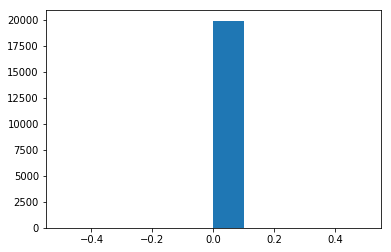

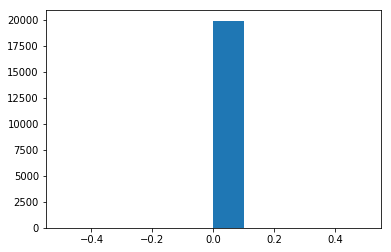

In [45]:
#Evolution of the system. At the end of the evolution a histogram of hamming distances between individuals is plotted for females and males.
evolve(males, females, 40, 200)
plt.hist(dist_ham(males))
plt.show()
plt.hist(dist_ham(females))
plt.show()

In [46]:
#Counter of different sequences in female population
differents = []
for female in females:
    st =female.tostring()
    if st not in differents:
        differents.append(st)
len(differents)

1

In [41]:
#Visualization of the fitness matrix. rows represents females, columns males.
k=3
base = np.array( [list(np.binary_repr(n,k)) for n in range(2**k)],dtype=int)
print(base)
np.matrix([[fitness(base[i], base[j]) for i in range(2**k)] for j in range(2**k)])

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


matrix([[-3, -1, -1,  1, -1,  1,  1,  3],
        [-2, -2,  0,  0,  0,  0,  2,  2],
        [-2,  0, -2,  0,  0,  2,  0,  2],
        [-1, -1, -1, -1,  1,  1,  1,  1],
        [-2,  0,  0,  2, -2,  0,  0,  2],
        [-1, -1,  1,  1, -1, -1,  1,  1],
        [-1,  1, -1,  1, -1,  1, -1,  1],
        [ 0,  0,  0,  0,  0,  0,  0,  0]])